# Lab 5 - Exploratory Data Analysis

| Member Name                         | Student ID           |
|----------------------------------------|-----------------------|
|Kanyaluck    Chimchome            |    64070501003   |
|Boonyarit     Samran                 |    64070501028   |  	
|Warisara      Patib                     |   64070501044    |  	
|Chanidapa   Chanama                |  64070501090    |	
|Nontawat      Kunlayawuttipong  |  64070501093   	|

**instruction** : Use `covertype` dataset, plot an appropriate visualization to answer following questions:

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing dataset
cvt = pd.read_csv("data/covertype.csv")
cvt.info() # viewing dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   index                               581012 non-null  int64 
 1   elevation                           581012 non-null  int64 
 2   aspect                              581012 non-null  int64 
 3   slope                               581012 non-null  int64 
 4   horizontal_distance_to_hydrology    581012 non-null  int64 
 5   vertical_distance_to_hydrology      581012 non-null  int64 
 6   horizontal_distance_to_roadways     581012 non-null  int64 
 7   hillshade_9am                       581012 non-null  int64 
 8   hillshade_noon                      581012 non-null  int64 
 9   hillshade_3pm                       581012 non-null  int64 
 10  horizontal_distance_to_fire_points  581012 non-null  int64 
 11  wilderness_type                     581

In [3]:
# looking into sample of dataset
cvt.head()

,index,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_type,usfs_code,usfs_code_desc,climatic_zone,geologic_zone,cover_type
0,0,2596,51,3,258,0,510,221,232,148,6279,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
1,1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
2,2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,4744,"Legault family - Rock land complex, stony",montane,igneous and metamorphic,Lodgepole Pine
3,3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,7746,Como family - Rock land - Legault family compl...,subalpine,igneous and metamorphic,Lodgepole Pine
4,4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen


## 1. Distribution of cover_type across different wilderness_Type

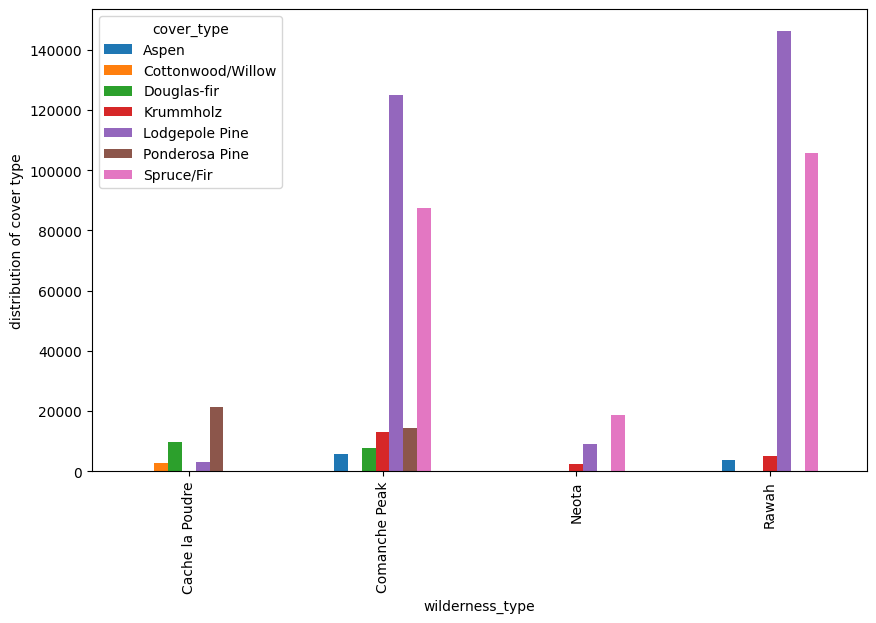

In [4]:
# count how many times of cover_types occured on different wilderness_type
# use pivot table function to create a new table that values in pivot table -> "number of count in each elevation"
plot1 = cvt.pivot_table(index = "wilderness_type", columns = "cover_type",
                        values = "elevation", aggfunc = "count")

# plotting by use bar graph which figsize width 10 and height 6
plot1.plot(kind = "bar", ylabel = "distribution of cover type", figsize = (10,6));

## 2. Distribution of elevation on each cover type

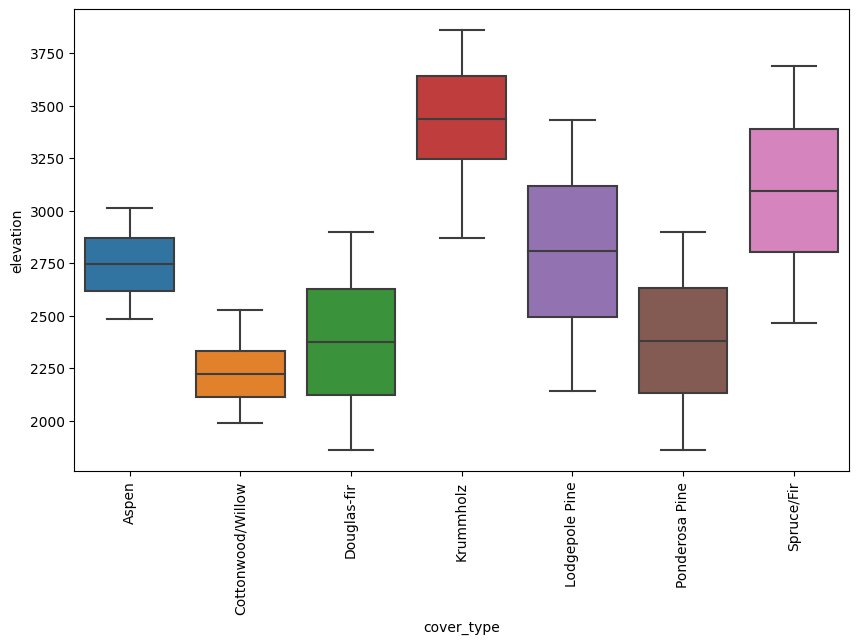

In [5]:
# count how many specific elevation occurs in any cover_type by using group by function
plot2 = cvt.groupby(['cover_type', 'elevation'])['elevation'].agg(count='count').reset_index()

# customizing plot which figsize width 10 and height 6
plt.figure(figsize=(10,6))
# plotting by use boxplot to see the distribution
sns.boxplot(x='cover_type', y='elevation',data=plot2)
# rotate "cover type" by 90 
plt.xticks(rotation=90);

## 3. Number of data points on each climatic zone

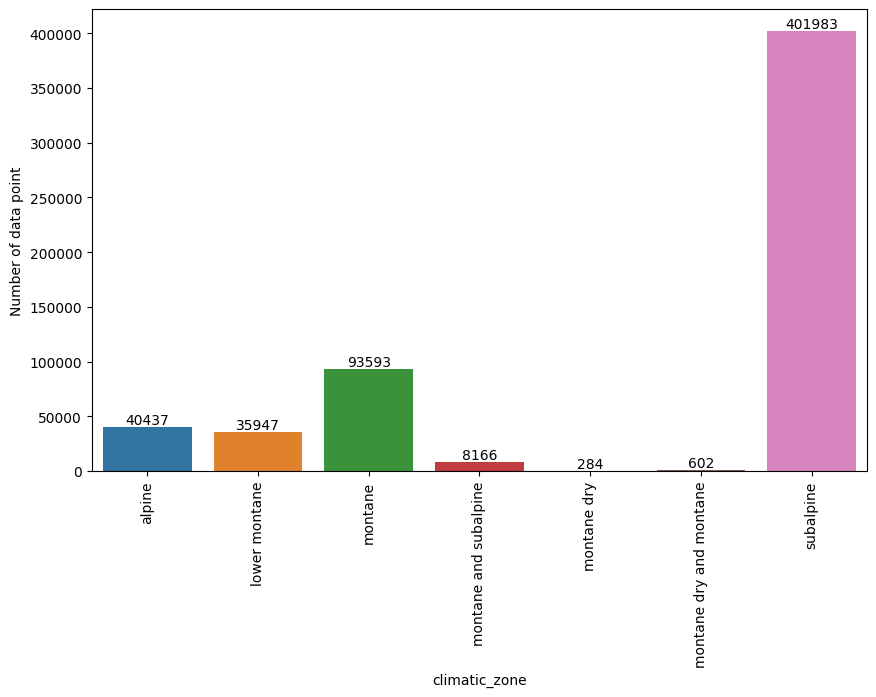

In [6]:
# count number of dataset classified with categories of climatic_zone
plot3 = cvt.groupby(['climatic_zone']).agg({'index':'count'}).reset_index()

# customizing plot which figsize width 10 and height 6
plt.figure(figsize=(10,6))
# use barplot to show number of data point on each climatic zone
ax = sns.barplot(x = 'climatic_zone', y = 'index', data =plot3, errwidth = 0)
# add bar label in each bar plot
ax.bar_label(ax.containers[0])
# add label at y-axis -> "Number of data point"
plt.ylabel('Number of data point')
# rotate "cover type" by 90 
plt.xticks(rotation=90);

## 4. Which cover type dominated subalpine climate

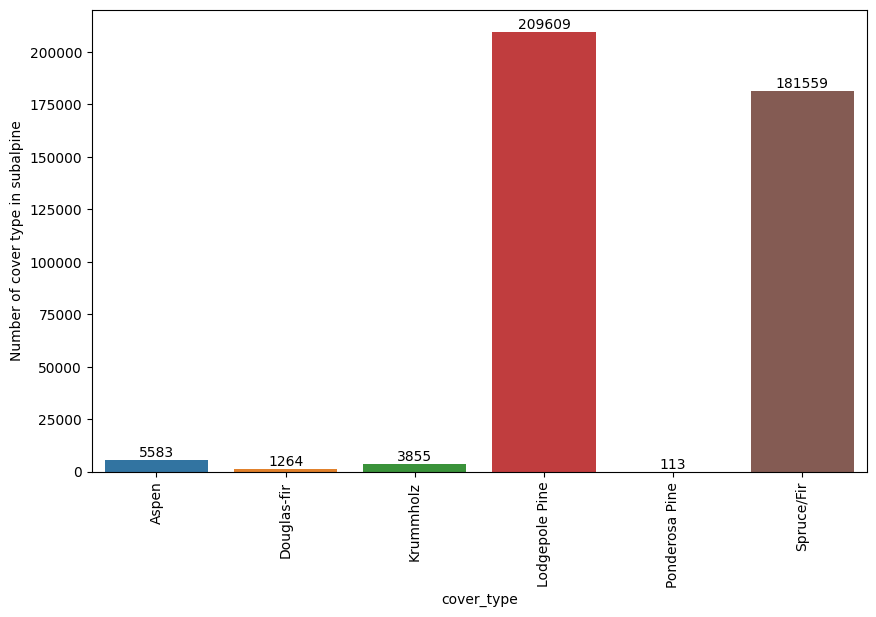

In [7]:
# count number of cover type in subalpine climate
plot4 = cvt[cvt["climatic_zone"] == "subalpine"].groupby(by = ['cover_type']).agg({'index':'count'}).reset_index()

# customizing plot which figsize width 10 and height 6
plt.figure(figsize=(10,6))
# use barplot to show number of cover type in subalpine
ax = sns.barplot(x = 'cover_type', y = 'index', data =plot4, errwidth = 0)
# add bar label in each bar plot
ax.bar_label(ax.containers[0])
# add label at y-axis -> "Number of data point"
plt.ylabel('Number of cover type in subalpine')
# rotate "cover type" by 90 
plt.xticks(rotation=90);

**Answer & Explanation** : 

## 5. Which cover types has a tendency to be found near bodies of water

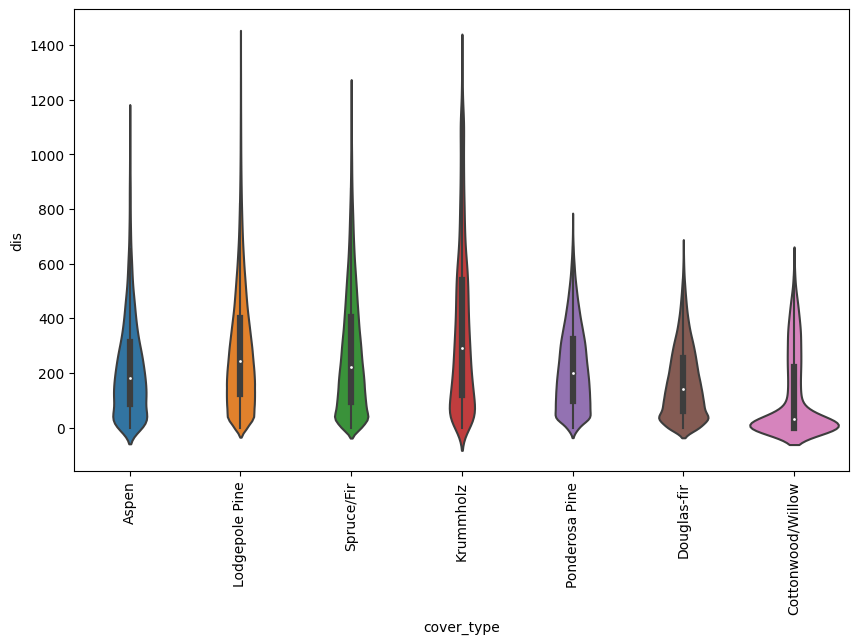

In [8]:
#
plot5 = cvt.loc[:,["horizontal_distance_to_hydrology","vertical_distance_to_hydrology","cover_type"]]
plot5["dis"] =  np.hypot(plot5['horizontal_distance_to_hydrology'],
                         plot5['vertical_distance_to_hydrology']) 

# customizing plot
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.violinplot(data=plot5, x = 'cover_type', y = 'dis') ;

**Answer & Explanation** : 

## 6. Which cover types has a tendency to be found on shady area from 9am to noon

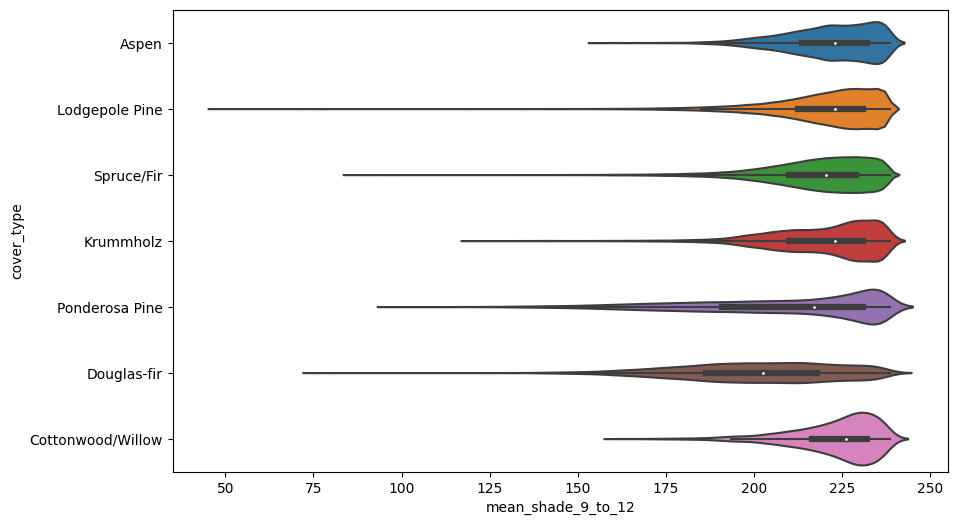

In [9]:
#
plot6 = cvt.loc[:,["hillshade_9am","hillshade_noon","cover_type"]]
plot6["mean_shade_9_to_12"] = plot6[["hillshade_9am","hillshade_noon"]].mean(axis = 1) 

# customizing plot
plt.figure(figsize=(10,6))
sns.violinplot(data=plot6, y = 'cover_type', x = 'mean_shade_9_to_12');

**Answer & Explanation** : 

## 7. Which cover types has a tendency to be found away from hazardous points(roadways/firepoints)

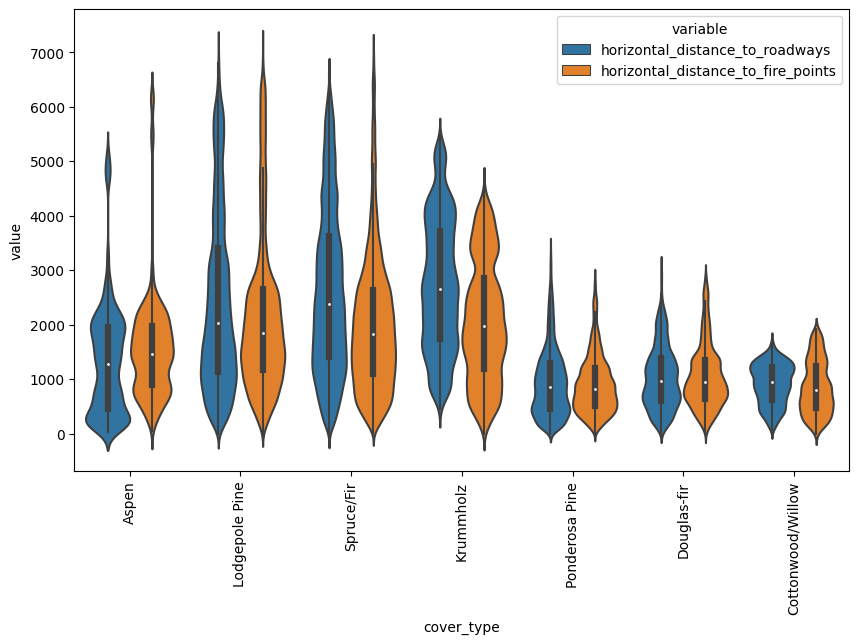

In [10]:
#
plot7 = cvt[["horizontal_distance_to_roadways","horizontal_distance_to_fire_points","cover_type"]]
plot7 = plot7.melt(id_vars = "cover_type",
                   value_vars = ["horizontal_distance_to_roadways","horizontal_distance_to_fire_points"])

# customizing plot
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.violinplot(data=plot7, x = 'cover_type', y = "value", hue = "variable") ;

**Answer & Explanation** : 

## 8. Determine whether elevation provides more information to distinguish Krummholz from Cottonwood/Willow than horizontal_distance_to_hydrology

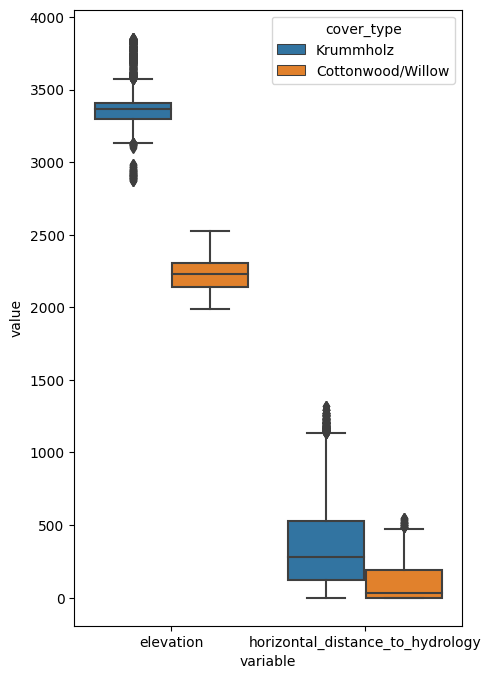

In [11]:
#
plot8 = cvt[["cover_type","elevation","horizontal_distance_to_hydrology"]]
plot8 = plot8[plot8["cover_type"].isin(["Krummholz","Cottonwood/Willow"])]
plot8 = plot8.melt(id_vars = "cover_type",
                   value_vars = ["elevation","horizontal_distance_to_hydrology"])

# customizing plot
plt.figure(figsize=(5,8))
sns.boxplot(data = plot8, x = "variable", y = 'value', hue = "cover_type");

**Explanation** : 

## 9. Compare the relationship between Krummholz and Cottonwood/Willow togeographical features (elevation, distance to hydrology, hillshade, etc.).

In [12]:
# preprocessing data
df = cvt[cvt["cover_type"].isin(["Krummholz","Cottonwood/Willow"])]
number_df = df.drop(["index","wilderness_type","usfs_code",
                     "usfs_code_desc","climatic_zone","geologic_zone"], axis =1)
category_df = df[["wilderness_type","usfs_code","climatic_zone","geologic_zone",
                     "cover_type"]]

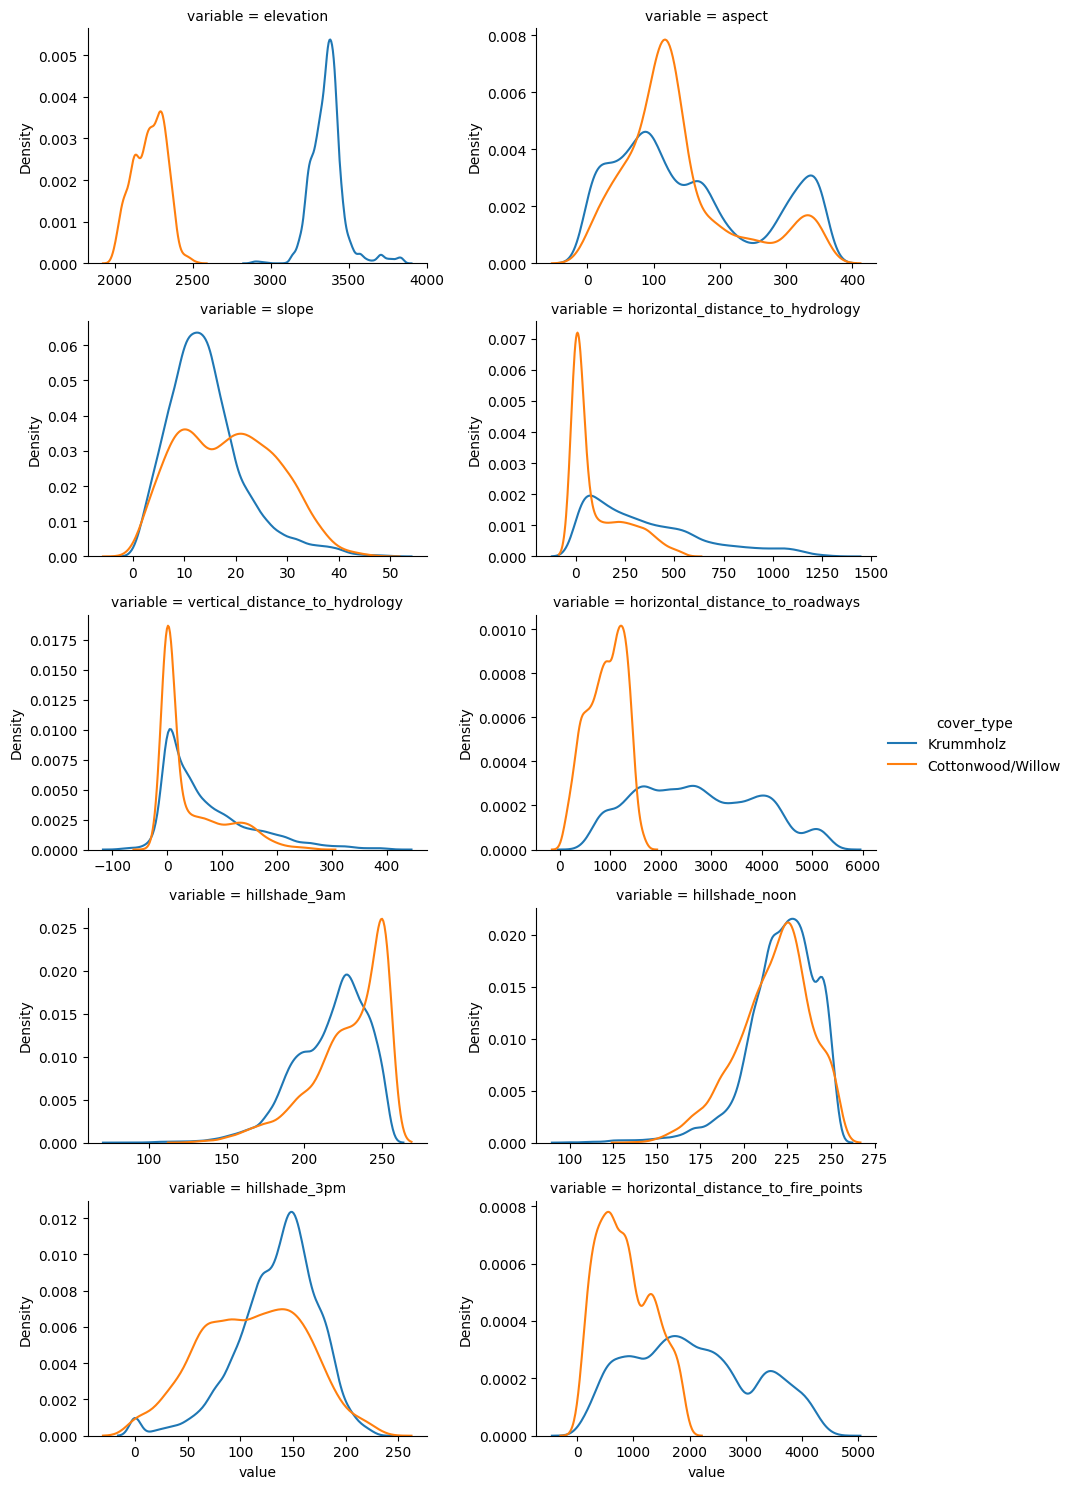

In [13]:
# compare relationship of numerical variables 
numberp_df = pd.melt(number_df, "cover_type")
plot9_1 = sns.FacetGrid(numberp_df, col = "variable", hue = "cover_type",
                        sharex=False, sharey=False, col_wrap = 2, aspect = 1.5)
plot9_1.fig.subplots_adjust(top=.5)
plot9_1.map(sns.kdeplot, "value")
plot9_1.add_legend();

**Explanation** : 

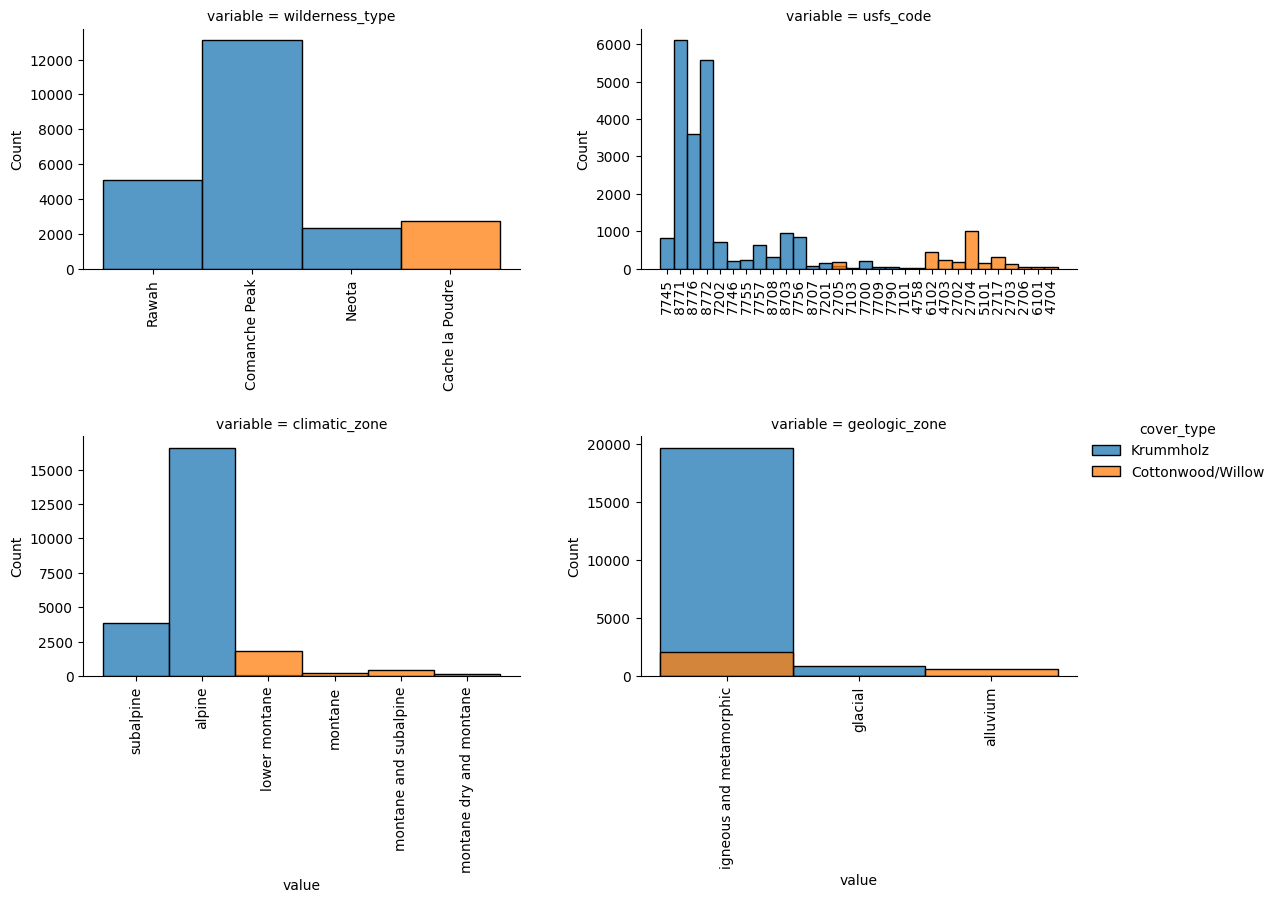

In [14]:
# compare relationship of categorical variables 
category_df = category_df.astype("str")
categoryp_df = pd.melt(category_df, "cover_type")
plot9_2 = sns.FacetGrid(categoryp_df, col = "variable", hue = "cover_type",
                        sharex=False, sharey=False, height = 3.7, aspect = 1.5, col_wrap = 2)
plot9_2.map(sns.histplot, "value")
plot9_2.set_xticklabels(rotation=90)
plt.subplots_adjust(hspace=0.7)
plot9_2.add_legend();

**Explanation** : 

## 10. Plot histogram of elevation, aspect, and slope. Discuss about the shape of the distribution.

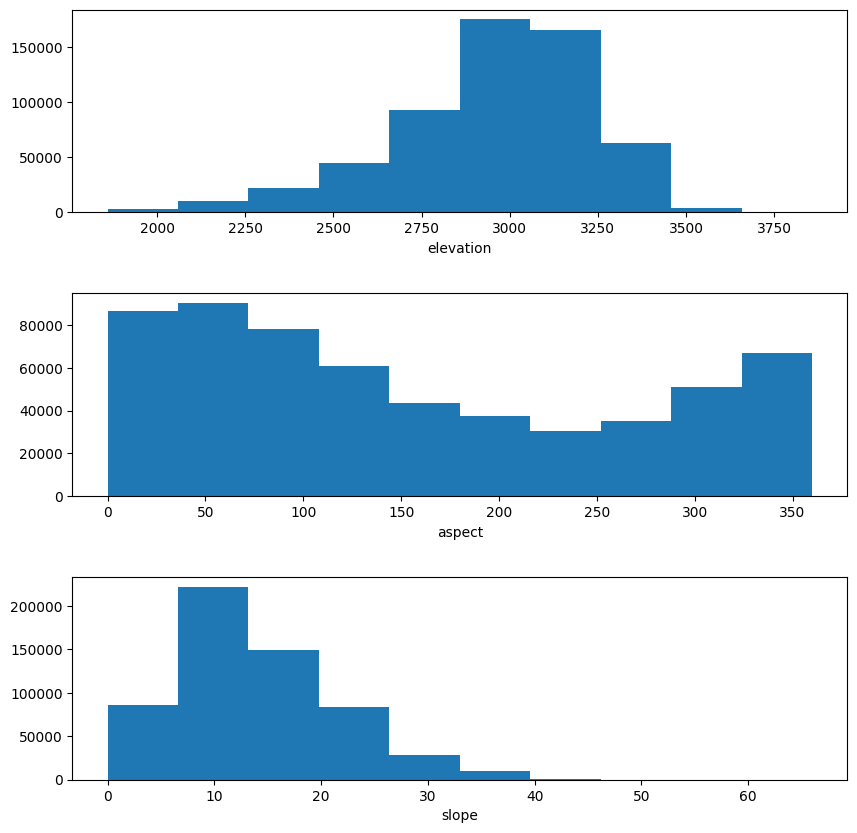

In [15]:
#
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,10))

# customizing plot 
plt.subplots_adjust(hspace=0.4)
ax[0].hist(cvt["elevation"])
ax[0].set(xlabel = "elevation");
ax[1].hist(cvt["aspect"])
ax[1].set(xlabel = "aspect");
ax[2].hist(cvt["slope"])
ax[2].set(xlabel = "slope");

**Discussion & Explanation** : 

## 11. For each member in your group, plot another useful visualization from this dataset.

### 11.1 mean of elevation, aspect ,and slope of every forest cover type (1028)

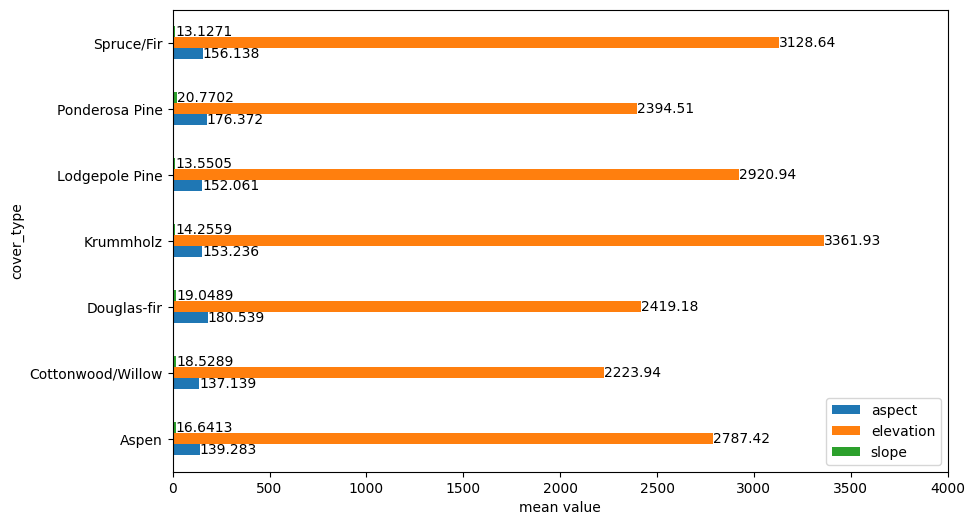

In [16]:
# do aggregate function on 3 variables : find average
pivot_df = cvt.pivot_table(index = "cover_type", values = ["elevation","aspect","slope"],
                                    aggfunc = np.mean)

# plotting & customizing bar graph of each variable
ax = pivot_df.plot.barh(legend = True, figsize = (10, 6))
ax.set(xlabel = "mean value")
ax.set_xlim(xmax = 4000)
ax.legend(loc = 4)

# show mean value at the end of bar plot(s).
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2]);

 geologic_zone relation between elevation, vertical_distance_to_hydrology, horizontal_distance_to_hydrology, horizontal_distance_to_fire_points (1090)

<AxesSubplot: >

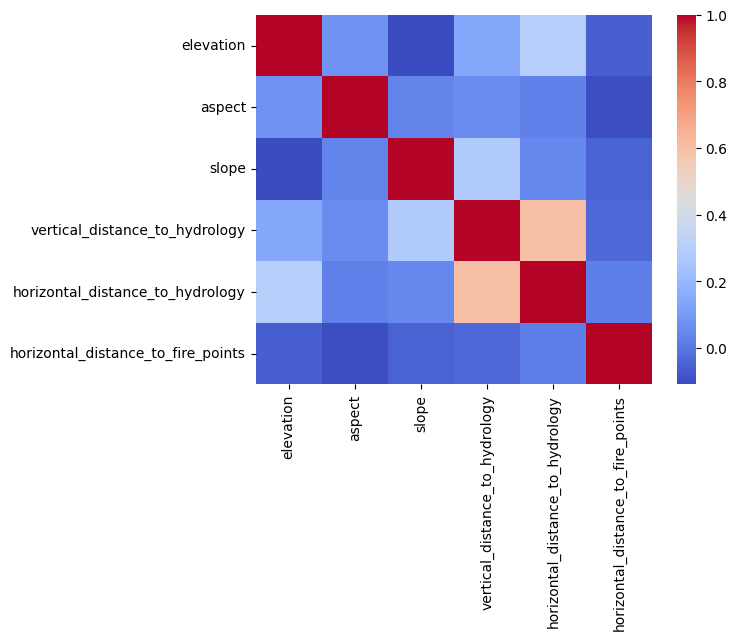

In [17]:
plot_1090 = cvt.loc[cvt['climatic_zone'] == 'subalpine', ['elevation', 'aspect', 'slope', 'vertical_distance_to_hydrology','horizontal_distance_to_hydrology','horizontal_distance_to_fire_points']]
sns.heatmap(plot_1090.corr(), cmap='coolwarm')

### (ของปอย รันเลขตามใจเลย) Relationship between elevation(which have range 250 meters) and hillshade in each time

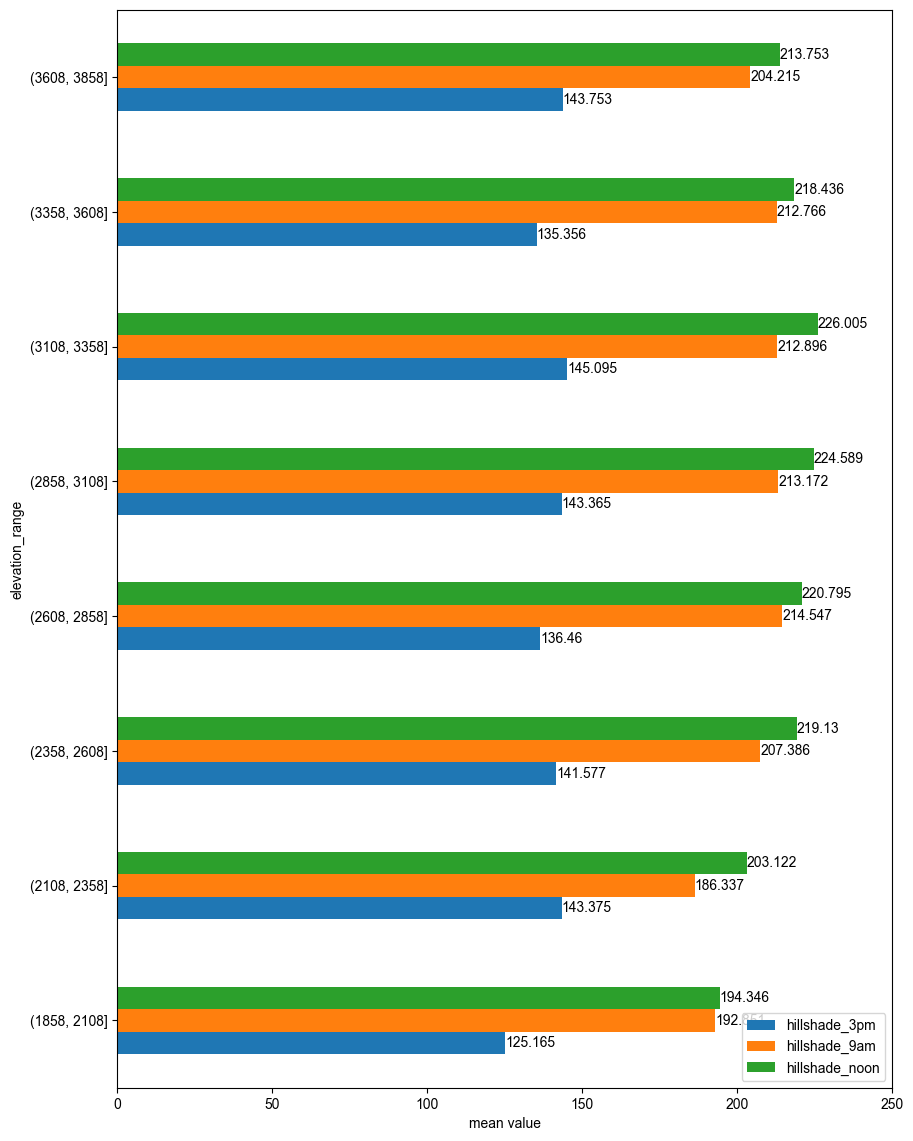

In [18]:
# find mean hillshade in each time in each elevation
plot1044 = cvt.pivot_table(index = "elevation",values = ["hillshade_9am","hillshade_noon","hillshade_3pm"],aggfunc=np.mean).reset_index()
# make a range of elevation = 250
plot1044["elevation_range"] = pd.cut(x=plot1044['elevation'], bins=np.arange(plot1044.elevation.min()-1,plot1044.elevation.max()+250, 250))
# group data by elevation_range
plot1044 = plot1044.groupby(['elevation_range']).mean().drop(columns='elevation').reset_index()

# plotting & customizing bar graph of each variable
ax = plot1044.plot.barh(x = 'elevation_range',figsize = (10, 14))
ax.set(xlabel = "mean value")
ax.set_xlim(xmax = 250)
# show mean value in each label
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
# change font size
sns.set(font_scale=0.8);